## Analysis: Hotels in Vienna


This mini project explores the relationship between hotel characteristics and prices in Vienna. 
Two relationships are analyzed: (1) between price and rating, and (2) between price and distance from the city center.


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pwd

'c:\\Users\\dcccddtcccccccc\\Desktop\\hotels-vienna\\analysis'

In [3]:
##Loading the dataset
df = pd.read_csv('../data/hotelbookingdata-vienna.csv')

In [4]:
#Displaying the first few rows of the dataset
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Austria,Vienna,36.0,2.7 miles,City centre,4.4 miles,Donauturm,17. Hernals,81,price for 1 night,...,_ACCOM_TYPE@Apartment,4.4 /5,1,21894,1,15-50% offer,2017,11,0,0
1,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,_ACCOM_TYPE@Hotel,3.9 /5,0,21897,1,1-15% offer,2017,11,0,0
2,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,_ACCOM_TYPE@Hotel,3.7 /5,0,21901,1,15-50% offer,2017,11,0,0
3,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,_ACCOM_TYPE@Hotel,5-Apr,0,21902,1,15-50% offer,2017,11,0,0
4,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,_ACCOM_TYPE@Hotel,3.9 /5,1,21903,1,15-50% offer,2017,11,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   addresscountryname      430 non-null    object 
 1   city_actual             430 non-null    object 
 2   rating_reviewcount      395 non-null    float64
 3   center1distance         430 non-null    object 
 4   center1label            430 non-null    object 
 5   center2distance         430 non-null    object 
 6   center2label            430 non-null    object 
 7   neighbourhood           430 non-null    object 
 8   price                   430 non-null    int64  
 9   price_night             430 non-null    object 
 10  s_city                  430 non-null    object 
 11  starrating              430 non-null    float64
 12  rating2_ta              327 non-null    float64
 13  rating2_ta_reviewcount  327 non-null    float64
 14  accommodationtype       430 non-null    ob

In [6]:
#Summary statistics
df.describe()

,rating_reviewcount,price,starrating,rating2_ta,rating2_ta_reviewcount,scarce_room,hotel_id,offer,year,month,weekend,holiday
count,395.000000,430.000000,430.000000,327.000000,327.000000,430.000000,430.000000,430.000000,430.0,430.0,430.0,430.0
mean,155.293671,131.513953,3.434884,3.992355,560.015291,0.597674,22153.334884,0.679070,2017.0,11.0,0.0,0.0
std,191.296684,91.551270,0.771244,0.481979,592.363590,0.490938,146.608733,0.467378,0.0,0.0,0.0,0.0
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0
25%,26.500000,83.000000,3.000000,3.500000,128.000000,0.000000,22028.250000,0.000000,2017.0,11.0,0.0,0.0
50%,84.000000,109.500000,3.500000,4.000000,335.000000,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0
75%,203.000000,146.000000,4.000000,4.500000,813.500000,1.000000,22278.500000,1.000000,2017.0,11.0,0.0,0.0
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0


In [7]:
# Checking for missing values
df.isna().sum()

addresscountryname          0
city_actual                 0
rating_reviewcount         35
center1distance             0
center1label                0
center2distance             0
center2label                0
neighbourhood               0
price                       0
price_night                 0
s_city                      0
starrating                  0
rating2_ta                103
rating2_ta_reviewcount    103
accommodationtype           0
guestreviewsrating         35
scarce_room                 0
hotel_id                    0
offer                       0
offer_cat                   0
year                        0
month                       0
weekend                     0
holiday                     0
dtype: int64

In [8]:
#Droping rating_review missing values and checking again 
df = df.dropna(subset=['rating_reviewcount'])
df.isna().sum()

addresscountryname         0
city_actual                0
rating_reviewcount         0
center1distance            0
center1label               0
center2distance            0
center2label               0
neighbourhood              0
price                      0
price_night                0
s_city                     0
starrating                 0
rating2_ta                71
rating2_ta_reviewcount    71
accommodationtype          0
guestreviewsrating         0
scarce_room                0
hotel_id                   0
offer                      0
offer_cat                  0
year                       0
month                      0
weekend                    0
holiday                    0
dtype: int64

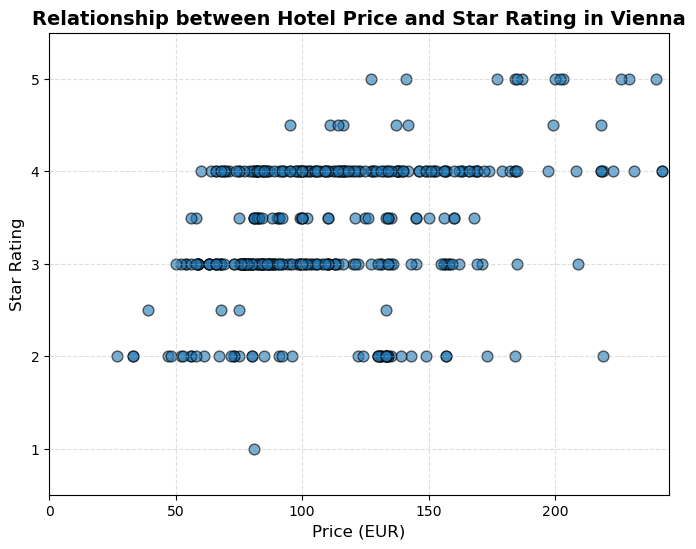

In [ ]:
#Relationship between price and star rating
plt.figure(figsize=(8,6))

plt.scatter(df['price'], df['starrating'], alpha=0.6, edgecolor='k', s=60)

plt.xlabel('Price (EUR)', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)
plt.title('Relationship between Hotel Price and Star Rating in Vienna', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.4)
plt.xlim(0, df['price'].quantile(0.95))  # removes extreme outliers
plt.ylim(0.5, 5.5)
plt.show()


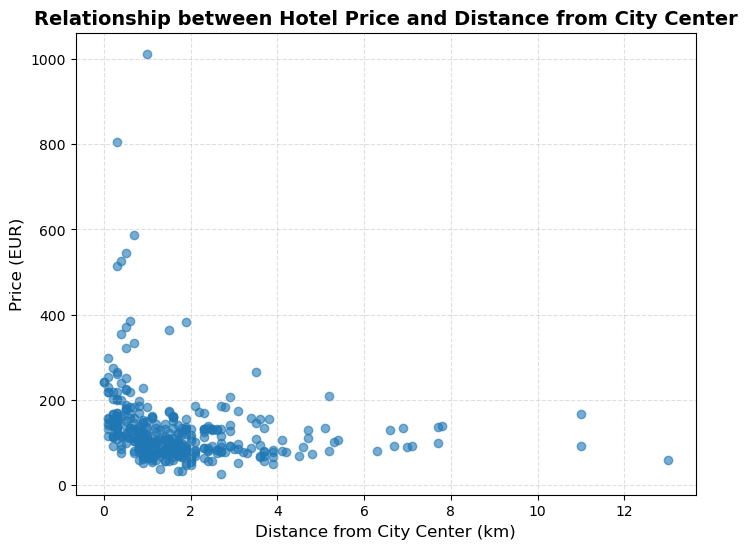

In [19]:

#Relationship between price and distance from city center

plt.figure(figsize=(8,6))
plt.scatter(df['center1distance'], df['price'], alpha=0.6)
plt.xlabel('Distance from City Center (km)', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.title('Relationship between Hotel Price and Distance from City Center', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()
